<a href="https://colab.research.google.com/github/kotharisanjana/CMPE255_DataMining_Fall2022/blob/main/Pycaret_TimeSeriesWtExog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations 

In [ ]:
#!pip install pycaret --user
!pip install pycaret-ts-alpha
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 8.6 MB/s 
     |████████████████████████████████| 2.0 MB 46.3 MB/s 
     |████████████████████████████████| 11.2 MB 60.2 MB/s 
     |████████████████████████████████| 1.8 MB 45.3 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 69 kB 4.7 MB/s 
     |████████████████████████████████| 134 kB 44.9 MB/s 
     |████████████████████████████████| 79.9 MB 121 kB/s 
     |████████████████████████████████| 303 kB 55.4 MB/s 
     |████████████████████████████████| 3.3 MB 49.3 MB/s 
     |████████████████████████████████| 6.5 MB 47.0 MB/s 
     |████████████████████████████████| 1.6 MB 19.4 MB/s 
     |████████████████████████████████| 957 kB 41.5 MB/s 
     |████████████████████████████████| 34.5 MB 18 kB/s 
     |████████████████████████████████| 9.8 MB 44.5 MB/s 
  Created wheel for pyod: filename=p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Kaggle API credentials

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 108kB/s]


## Imports and settings

In [ ]:
import opendatasets as od
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
from datetime import datetime
from pycaret.utils import enable_colab
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
enable_colab()
%matplotlib inline

Colab mode enabled.


## Download dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/ahmedadam415/digital-currency-time-series')

100%|██████████| 40.3k/40.3k [00:00<00:00, 17.9MB/s]

In [ ]:
df = pd.read_csv('/content/digital-currency-time-series/dc.csv')

## Exploratory Data Analysis

In [ ]:
df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [ ]:
df = df.rename(columns = {'Unnamed: 0':'Date'})

In [ ]:
min(df.Date), max(df.Date)

('2018-05-07', '2021-01-30')

In [ ]:
df = df[['Date', 'close_USD']].sort_values(by = ['Date'])
df.head()

,Date,close_USD
999,2018-05-07,9365.00
998,2018-05-08,9187.56
997,2018-05-09,9310.00
996,2018-05-10,9002.20
995,2018-05-11,8400.00


In [ ]:
df.describe()

,close_USD
count,1000.000000
mean,9310.335850
std,5846.917681
min,3211.720000
25%,6466.762500
50%,8189.330000
75%,10220.170000
max,40582.810000


In [ ]:
df.shape

(1000, 2)

## Data Transformation

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

df = df.asfreq('D')

In [ ]:
df.head()

,close_USD
Date,
2018-05-07,9365.00
2018-05-08,9187.56
2018-05-09,9310.00
2018-05-10,9002.20
2018-05-11,8400.00


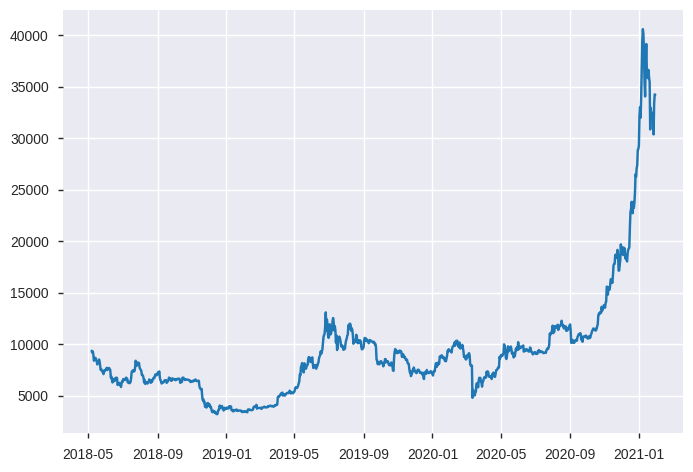

In [ ]:
plt.plot(df.index, df.close_USD)
plt.show()

In [ ]:
exp = TSForecastingExperiment()
exp.setup(data = df, fh = 30, transform_target = 'log')

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: d8a6
INFO:logs:self.variable_keys: {'primary_sp_to_use', '_all_models', 'html_param', 'fold_groups_param_full', 'gpu_param', 'fh', 'n_jobs_param', 'USI', '_all_metrics', 'display_container', 'y_test', 'fold_param', 'exp_id', 'logging_param', '_gpu_n_jobs_param', 'exp_name_log', 'X_test_transformed', 'y_train_transformed', 'fold_generator', 'X_train_transformed', 'X_test', 'master_model_container', 'memory', 'seed', '_all_models_internal', '_available_plots', 'y', 'y_test_transformed', 'enforce_exogenous', 'enforce_pi', 'seasonal_period', 'y_transformed', 'seasonality_present', 'y_train', 'X_transformed', 'data', 'approach_type', 'X_train', 'exogenous_present', 'pipeline', 'strictly_positive', '_ml_usecase', 'variable_keys', 'X', 'idx', 'experiment__', 'index_type', 'log_plots_param', 'all

,Description,Value
0,session_id,4227
1,Target,close_USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1000, 1)"
5,Train data shape,"(970, 1)"
6,Test data shape,"(30, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.97s...............


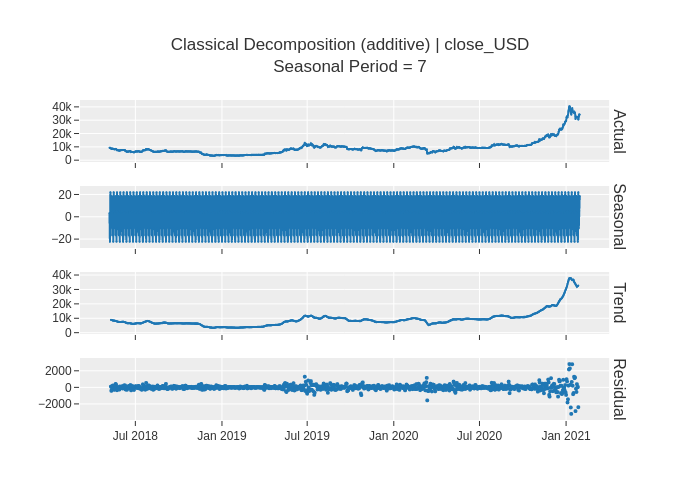

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.plot_model(plot = 'decomp')

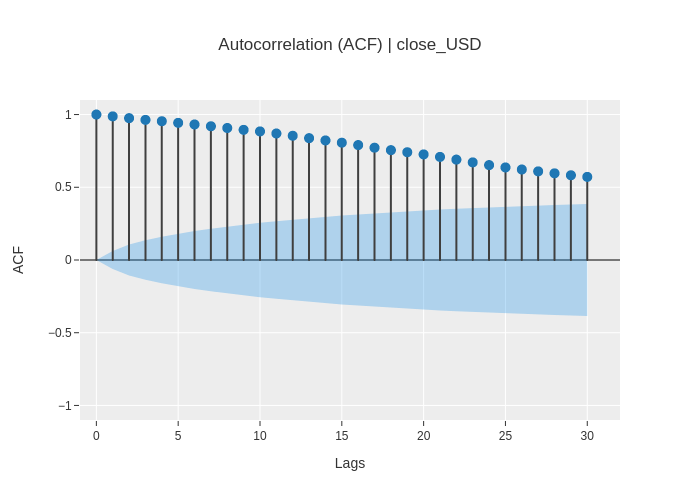

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.plot_model(plot = 'acf')

## Model creation

In [ ]:
exp.models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [ ]:
snaive = exp.create_model('snaive')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1357.4247,1710.5928,0.1061,0.1154,2.6001,2.2487,-1.4867
1,2020-11-01,3332.5697,3715.9266,0.1903,0.2147,6.3146,4.8610,-4.1341
2,2020-12-01,4010.9377,5242.5741,0.1638,0.1880,7.2387,6.5616,-1.3695
Mean,NaT,2900.3107,3556.3645,0.1534,0.1727,5.3845,4.5571,-2.3301
SD,NaT,1125.5869,1446.3328,0.0352,0.0420,2.0046,1.7738,1.2765


INFO:logs:master_model_container: 7
INFO:logs:display_container: 24
INFO:logs:NaiveForecaster(sp=7)
INFO:logs:create_model() successfully completed......................................


In [ ]:
exp_smooth = exp.create_model('exp_smooth')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1420.8798,1778.4644,0.1111,0.1213,2.7217,2.3380,-1.6879
1,2020-11-01,2954.1072,3339.6492,0.1680,0.1873,5.5975,4.3688,-3.1470
2,2020-12-01,3253.6281,4498.0371,0.1302,0.1471,5.8719,5.6297,-0.7443
Mean,NaT,2542.8717,3205.3836,0.1364,0.1519,4.7304,4.1121,-1.8597
SD,NaT,802.7360,1114.3128,0.0236,0.0272,1.4248,1.3560,0.9884


INFO:logs:master_model_container: 5
INFO:logs:display_container: 16
INFO:logs:ExponentialSmoothing(seasonal='mul', sp=7, trend='add')
INFO:logs:create_model() successfully completed......................................


In [ ]:
auto_arima = exp.create_model('auto_arima')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1462.9876,1819.7271,0.1146,0.1252,2.8023,2.3922,-1.8141
1,2020-11-01,3065.0484,3462.5675,0.1743,0.1952,5.8077,4.5296,-3.4579
2,2020-12-01,3388.2430,4682.6265,0.1356,0.1540,6.1149,5.8607,-0.8904
Mean,NaT,2638.7597,3321.6404,0.1415,0.1581,4.9083,4.2608,-2.0541
SD,NaT,841.8011,1173.0142,0.0248,0.0287,1.4944,1.4287,1.0618


INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:AutoARIMA(random_state=4227, sp=7, suppress_warnings=True)
INFO:logs:create_model() successfully completed......................................


In [ ]:
rf_cds_dt = exp.create_model('rf_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1386.7775,1713.0675,0.1088,0.1181,2.6564,2.2520,-1.4939
1,2020-11-01,2978.2037,3348.8149,0.1696,0.1891,5.6431,4.3808,-3.1698
2,2020-12-01,3505.0840,4717.4026,0.1414,0.1603,6.3258,5.9043,-0.9186
Mean,NaT,2623.3550,3259.7617,0.1399,0.1558,4.8751,4.1790,-1.8607
SD,NaT,900.4605,1228.1301,0.0248,0.0291,1.5934,1.4978,0.9550


INFO:logs:master_model_container: 6
INFO:logs:display_container: 17
INFO:logs:BaseCdsDtForecaster(regressor=RandomForestRegressor(n_jobs=-1,
                                                    random_state=4227),
                    sp=7, window_length=7)
INFO:logs:create_model() successfully completed......................................


In [ ]:
prophet = exp.create_model('prophet')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1004.4547,1197.0221,0.0794,0.0839,1.9240,1.5736,-0.2177
1,2020-11-01,5125.9643,5856.9566,0.2910,0.3571,9.7127,7.6618,-11.7549
2,2020-12-01,1451.5291,1727.1969,0.0631,0.0660,2.6196,2.1617,0.7428
Mean,NaT,2527.3160,2927.0585,0.1445,0.1690,4.7521,3.7990,-3.7432
SD,NaT,1846.5641,2083.0264,0.1038,0.1332,3.5191,2.7419,5.6786


INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:ProphetPeriodPatched()
INFO:logs:create_model() successfully completed......................................


## Tune model

In [ ]:
tuned_auto_arima = exp.tune_model(auto_arima)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1462.9876,1819.7271,0.1146,0.1252,2.8023,2.3922,-1.8141
1,2020-11-01,3065.0484,3462.5675,0.1743,0.1952,5.8077,4.5296,-3.4579
2,2020-12-01,3388.2430,4682.6265,0.1356,0.1540,6.1149,5.8607,-0.8904
Mean,NaT,2638.7597,3321.6404,0.1415,0.1581,4.9083,4.2608,-2.0541
SD,NaT,841.8011,1173.0142,0.0248,0.0287,1.4944,1.4287,1.0618


INFO:logs:master_model_container: 10
INFO:logs:display_container: 27
INFO:logs:AutoARIMA(random_state=4227, sp=7, suppress_warnings=True)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_prophet = exp.tune_model(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-10-02,1747.7386,1949.1009,0.1401,0.1528,3.3478,2.5623,-2.2284
1,2020-11-01,4697.9500,5501.0969,0.2653,0.3226,8.9017,7.1963,-10.2520
2,2020-12-01,1435.2976,1692.4594,0.0670,0.0640,2.5903,2.1183,0.7530
Mean,NaT,2626.9954,3047.5524,0.1575,0.1798,4.9466,3.9589,-3.9091
SD,NaT,1469.9307,1738.0788,0.0819,0.1073,2.8137,2.2963,4.6473


INFO:logs:master_model_container: 13
INFO:logs:display_container: 28
INFO:logs:ProphetPeriodPatched()
INFO:logs:tune_model() succesfully completed......................................


## Prediction on test set


INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Seasonal Naive Forecaster,7761.535,8373.6252,0.2181,0.2487,12.7283,8.9013,-7.3666


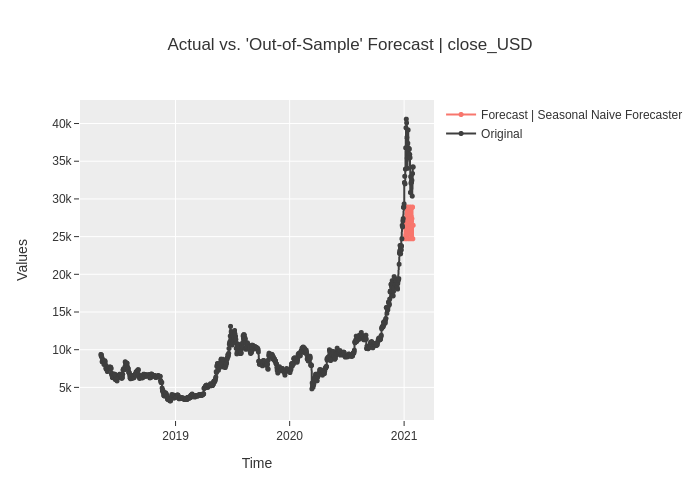

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(snaive)
exp.plot_model(estimator = snaive)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Exponential Smoothing,3815.7826,4569.7808,0.1058,0.1121,6.2576,4.8577,-1.4918


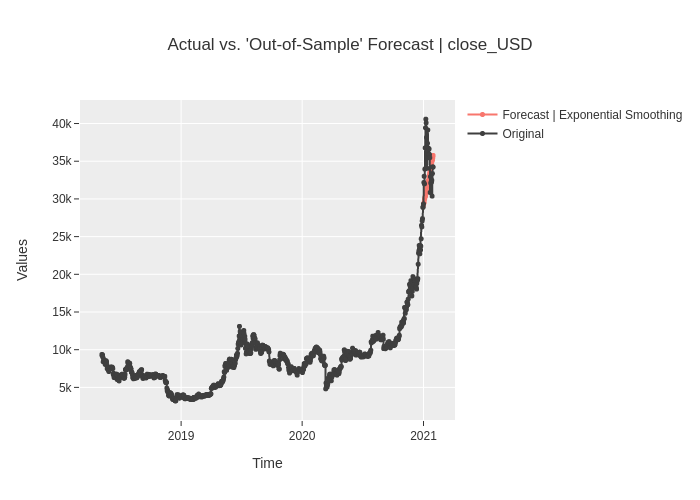

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(exp_smooth)
exp.plot_model(estimator = exp_smooth)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Auto ARIMA,3875.4705,4540.2812,0.108,0.1135,6.3555,4.8264,-1.4597


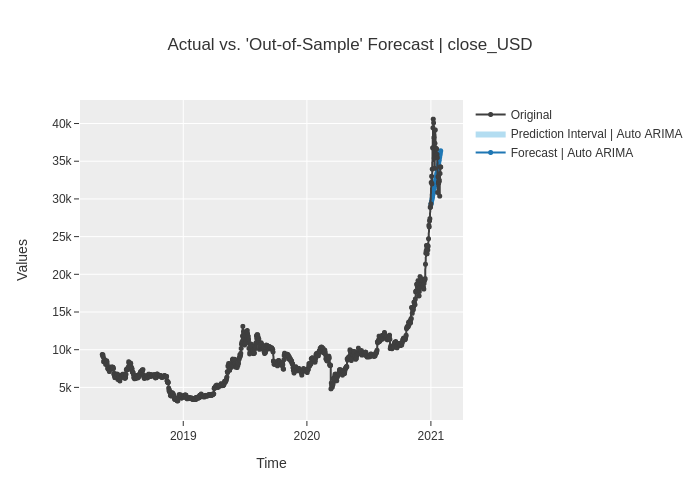

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(auto_arima)
exp.plot_model(estimator = auto_arima)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Auto ARIMA,3875.4705,4540.2812,0.108,0.1135,6.3555,4.8264,-1.4597


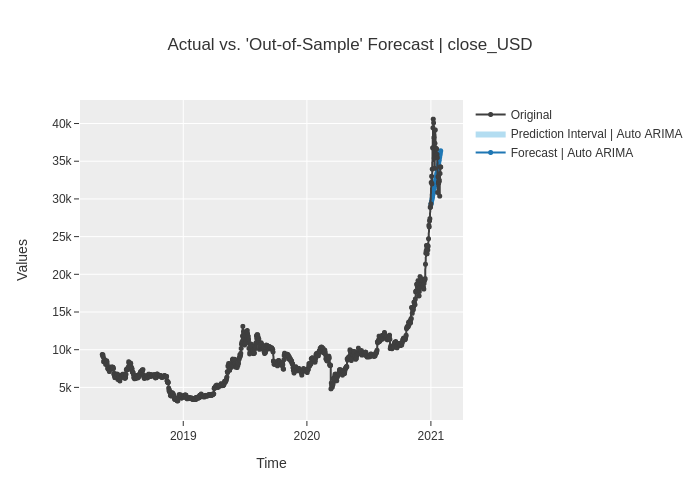

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(tuned_auto_arima)
exp.plot_model(estimator = tuned_auto_arima)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,RandomForestRegressor,5735.7636,6460.5678,0.1591,0.1761,9.4062,6.8677,-3.9804


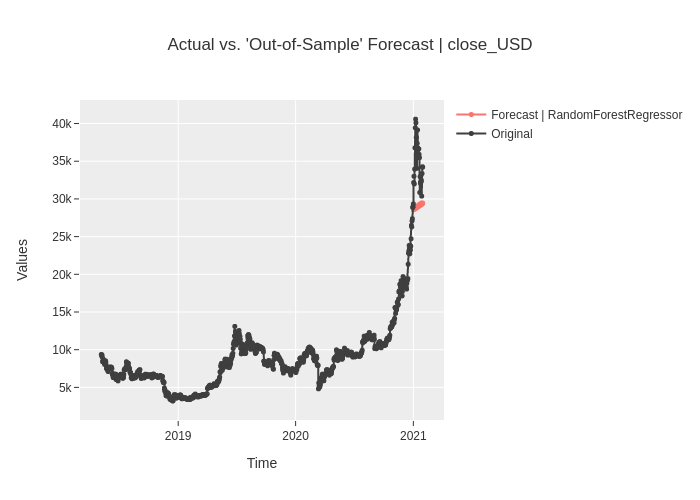

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(rf_cds_dt)
exp.plot_model(estimator = rf_cds_dt)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Prophet,6070.5965,7563.5751,0.179,0.1628,9.9553,8.0402,-5.8261


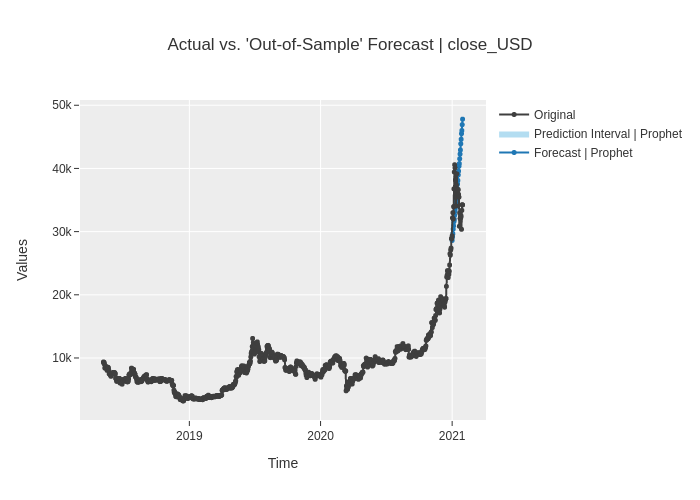

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(prophet)
exp.plot_model(estimator = prophet)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Prophet,6070.5965,7563.5751,0.179,0.1628,9.9553,8.0402,-5.8261


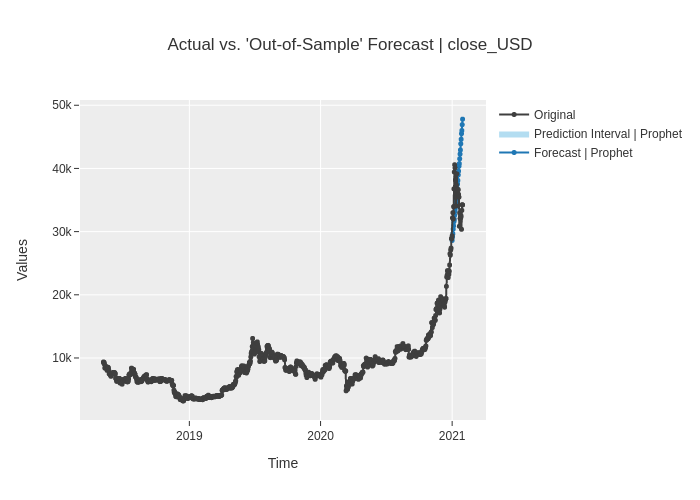

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(tuned_prophet)
exp.plot_model(estimator = tuned_prophet)